In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AmericanFootball98.csv')

df['team'] = df['team_code'].str.slice(0, 3) 
df['year'] = df['team_code'].str.slice(3) 

# Question 1: Which teams improve and worsened the most over the span of our data?
We took the teams average wins during the 1999-2003 timeframe and compared that to their wins from 2015-2019. The goal was to find which teams were most improved over the time period. The New England Patriots came out as the most improved team, with a lot of validity behind this. The margian they improved by was exactly 3 games per season. This helped the team reach the playoffs every season and win an outstanding 3 Super Bowls during the period from 2015-2019. The 1999-2003 period was the beginning of the Tom Brady dynasty being built, and the data reflects the success overtime during the 2015-2019 period. This team's defense during that period allowed for 282.2 total season points. On the other hand, The Tampa Bay Buccaneers experienced a falling off from the start of the decade, being super bowl champions and having a well established offense and their outstanding defense including Derrick Brooks, Simeon Rice, and Warren Sapp. Tampa Bay later struggled with their defense heavily allowing opposing teams to rack up a total of 415.8 points against them

In [57]:
# Question 1: Which teams improve and worsened the most over the span of our data?

teams_delta_wins = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	if len(team_df) == 2020 - 1999:
		
		early_total = 0
		late_total  = 0

		for year in range(2015, 2020):
			late_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["wins"])
		
		for year in range(1999, 2004):
			early_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["wins"])

		teams_delta_wins[team] = (late_total - early_total)/5

teams_delta_wins = dict(sorted(teams_delta_wins.items(), key=lambda item: item[1]))

print("Question 1: Which team gained/lost the most wins per season between 1999-2003 and 2015-2019")
print(list(teams_delta_wins.keys())[-1] + " changed " + str(list(teams_delta_wins.values())[-1]))
print(list(teams_delta_wins.keys())[0]  + " changed " + str(list(teams_delta_wins.values())[0]))


Question 1: Which team gained/lost the most wins per season between 1999-2003 and 2015-2019
nwe changed 3.0
oti changed -3.4


# Question 2: Did Kansas City Chiefs actually become stronger after getting a new coach in 2013?
There is a common perception that the Kansas City Chiefs had one of the largest rebounds as a team as they replaced their coach for the 2013 season and went on to do significantly better. We wanted to see if we could replicate this change with our dataset. We took 6 years after and before 2013, to balance out the data, and were looking for a jump in the data. In addition, we also graphed the wins over time to see if the data also showed their. 

During the time period from 2006-2013: the Kansas City Chiefs won an average 5.43 games, which is a losing record per year on average. After the coaching change to Andy Reid, the Chiefs won an average of 11 games per season which is a winning record per season. Overall, with Andy Reid being introduced they experienced an increase of 5.57 more games won per season. 



How did Kansas City Chiefs stats change with a new coach in 2013?
Avg wins during 2006 - 2013: 5.428571428571429
Avg wins during 2013 - 2019: 11.0
Change in avg wins after new coach: 5.571428571428571


C:\Users\llsad\AppData\Local\Temp\ipykernel_3044\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_3044\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_3044\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_3044\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_3044\824396651.py:7: UserWarning: Boolean Se

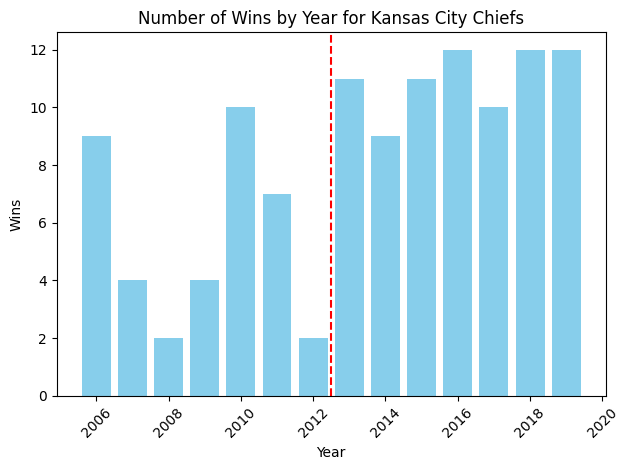

In [58]:
# Question 2: Did Kansas City Chiefs actually become stronger after getting a new coach in 2013?

early_total = 0
late_total  = 0

for year in range(2006, 2013):
	early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
	
for year in range(2013, 2020):
	late_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])

print("\nHow did Kansas City Chiefs stats change with a new coach in 2013?")
print("Avg wins during 2006 - 2013: " + str(early_total / 7))
print("Avg wins during 2013 - 2019: " + str(late_total / 7))
print("Change in avg wins after new coach: " + str((late_total - early_total) / 7))

plt.bar(range(2006,2020), df[df["team"] == "kan"][df["year"].astype(int) > 2005].sort_values(by="year", ascending=True)["wins"], color="skyblue")
plt.title("Number of Wins by Year for Kansas City Chiefs")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x=2012.5, color="red", linestyle="--", linewidth=1.5, label="new coach")

plt.show()

# Question 3: Which teams get the most favor in penalty calls?
Most fans get most riled up during penalty calls and often accuse others and referees of being biased in favor of their opponents. We suspect that most of these claims are unfounded, although we still wanted to use our dataset to see if there were teams receiving significantly more penalties called in their favor. We see certain discrepancies through data such as the Cleveland Browns who receive the most penalty yards but fail to have winning records or playoff success. Even still, the data seems to indicate their is not a significant difference between the lowest and highest teams to the point that any one team is receiving an advantage.


Which team get most favor during penalties?
mia get given an average of 3179 penalties
tam get given an average of 3081 penalties
rai get given an average of 2981 penalties
crd get given an average of 2879 penalties
oti get given an average of 2768 penalties

Which team get least favor during penalties?
sdg get given an average of 105 penalties
phi get given an average of 209 penalties
atl get given an average of 318 penalties
kan get given an average of 420 penalties
buf get given an average of 519 penalties


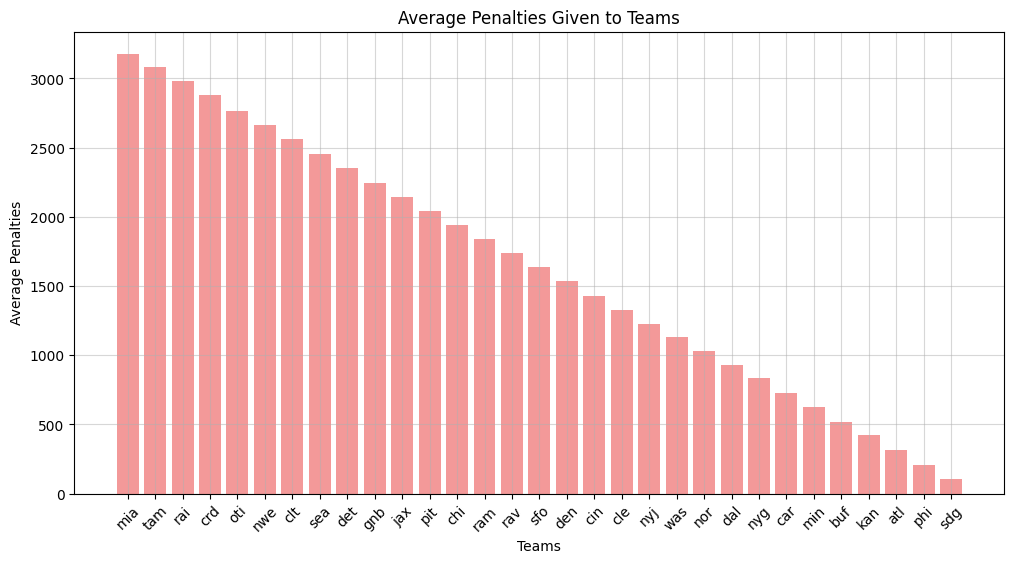

In [59]:
# Question 3: Which teams get the most favor in penalty calls?

teams_delta_pen = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	if len(team_df) == 2020 - 1999:
		
		for year in range(1999, 2020):
			late_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["opp penalties"])

		teams_delta_pen[team] = (late_total - early_total)/21

teams_delta_pen = dict(sorted(teams_delta_pen.items(), key=lambda item: item[1]))

print("\nWhich team get most favor during penalties?")
for i in range(5):
	print(list(teams_delta_pen.keys())[-i-1] + " get given an average of " + str(int(list(teams_delta_pen.values())[-i-1])) + " penalties")

print("\nWhich team get least favor during penalties?")
for i in range(5):
	print(list(teams_delta_pen.keys())[i] + " get given an average of " + str(int(list(teams_delta_pen.values())[i])) + " penalties")

teams_delta_pen = sorted(teams_delta_pen.items(), key=lambda x: x[1], reverse=True)
teams, penalties = zip(*teams_delta_pen)

plt.figure(figsize=(12, 6))
plt.bar(teams, penalties, color="lightcoral", alpha=0.8)
plt.title("Average Penalties Given to Teams")
plt.xlabel("Teams")
plt.ylabel("Average Penalties")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

plt.show()

# Question 4: What is each team's best 5-year streak?
Fans often fondly remember when their team seemed to always win, to have a great coach or QB, or for any other reason. We wanted to see if each team's best 5-year seasonal window would line up with what fans remember. For this statistic we wanted to run this script over all teams and seasons, so we could determine if a team has had several strong seasons over the past few years. These periods stick with fans who would recall eras when their team was unstoppable or when their rival always seemed to win. We wanted to compare these assumptions to our data by mapping out the strongest 5 year streak for a team. 
Different teams such as the New England Patriots, Green Bay Packers, and Pittsburgh Steelers showed evidence by their results and superbowl wins/appearances. The Pittsburgh Steelers experienced major success in their Quarterback Position with Ben Roethlisberger who attributed to an outstanding winning record and two Super Bowl wins. Aaron Rodgers also attributed to overall success during a period

In [60]:
# Question 4: What is each team's best 5-year streak?

teams_best_streak = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	
	if len(team_df) == 2020 - 1999:
		
		best_score = -1
		best_year = -1
		for year in range(1999, 2015):
			
			score = 0	
			for inc in range(5):
				score += team_df[ team_df["year"] == str(year + inc)].iloc[0]["wins"]
				
			score /= 5
			if score > best_score:
				best_year  = year
				best_score = score
			
		teams_best_streak[team] = (best_score, int(best_year))
		
teams_best_streak = dict(sorted(teams_best_streak.items(), key=lambda item: item[1][0]))
print("Best 5-year streak by team")
for i in range(10):
	start_year = str(list(teams_best_streak.values())[-i-1][1])
	end_year = str(list(teams_best_streak.values())[-i-1][1] + 5)
	print(list(teams_best_streak.keys())[-i-1] + " avg season wins " + str(list(teams_best_streak.values())[-i-1][0]) + " wins over " + start_year + "-" + end_year)




Best 5-year streak by team
nwe avg season wins 13.2 wins over 2003-2008
clt avg season wins 13.0 wins over 2005-2010
den avg season wins 11.8 wins over 2012-2017
phi avg season wins 11.8 wins over 2000-2005
oti avg season wins 11.2 wins over 1999-2004
sea avg season wins 11.2 wins over 2012-2017
gnb avg season wins 11.2 wins over 2010-2015
pit avg season wins 11.2 wins over 2004-2009
ram avg season wins 11.2 wins over 1999-2004
atl avg season wins 11.2 wins over 2008-2013


# Question 5: Which teams have the strongest and weakest offenses?
We wanted to measure what were the strongest and weakest offensive lines in recent seasons (2015 - 2019) to determine if this aligned with fan’s perceptions of a team's offensive performance over the period. We used the fumble ratios, i.e. the number of times the ball was lost to the opposing team on the offense's throw, which is one of the most important indicators for an offense's strength without measuring the ability of the QB, whose stats are often separated out from the rest of the offensive players. The strongest offense which was displayed by the Patriots supports the data we found, which is further proven by super bowl appearances and wins.  


In [61]:
# Question 5: Which teams have the strongest and weakest offenses?
teams_ratio_fumble = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	fumbles = 0
	completions = 0
	if len(team_df) == 2020 - 1999:
		
		for year in range(2015, 2020):
			fumbles += int(team_df[ team_df["year"] == str(year)].iloc[0]["Fumbles Lost"])
			completions += int(team_df[ team_df["year"] == str(year)].iloc[0]["completions"])

		teams_ratio_fumble[team] = fumbles / (completions + fumbles) 

teams_ratio_fumble = dict(sorted(teams_ratio_fumble.items(), key=lambda item: item[1]))

print("Strongest offensive line measured by fumbles ratio")
for i in range(3):
	print(list(teams_ratio_fumble.keys())[i] + " has a fumble ratio of " + str(round(list(teams_ratio_fumble.values())[i], 4)) )

print("Weakest offensive line measured by fumbles ratio")
for i in range(3):
	print(list(teams_ratio_fumble.keys())[-i-1] + " has a fumble ratio of " + str(round(list(teams_ratio_fumble.values())[-i-1], 4)) )



Strongest offensive line measured by fumbles ratio
nwe has a fumble ratio of 0.0169
nor has a fumble ratio of 0.0176
pit has a fumble ratio of 0.0178
Weakest offensive line measured by fumbles ratio
jax has a fumble ratio of 0.034
cle has a fumble ratio of 0.032
sfo has a fumble ratio of 0.0297


# Question 6: Which teams have the strongest and weakest defenses?
We wanted to conduct measurements on the defense of teams, as this is independently one of the most important characteristics of a team. We want to verify perception about the strongest and weakest team’s defense compared to the data at hand.

We found the these results generally align with the fan's idea of the team's defense. New England was the strongest defense by a good margian, as the points scored by opposing teams could be lower due to the hyper powered offense that scored and won a lot of games for the team. The teams that struggled including the Cleveland Browns and Tampa Bay Buccaneers had high fumble ratios and negative records through the 2015-2019 seasons


In [62]:
# Question 6: Which teams have the strongest and weakest defenses?

teams_avg_opp_points = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	given = 0
	if len(team_df) == 2020 - 1999:
		
		for year in range(2015, 2020):
			given += int(team_df[ team_df["year"] == str(year)].iloc[0]["opp PF"])

		teams_avg_opp_points[team] = given / 5

teams_avg_opp_points = dict(sorted(teams_avg_opp_points.items(), key=lambda item: item[1]))

print("\n\nWhich defenses were the strongest between 2015-2019?")
print("\nStrongest defense measured by opposition points given")
for i in range(3):
	print(list(teams_avg_opp_points.keys())[i] + " gave an average of " + str(round(list(teams_avg_opp_points.values())[i], 4)) + " points" )

print("\nWeakest defense measured by opposition points given")
for i in range(3):
	print(list(teams_avg_opp_points.keys())[-i-1] + " gave an average of " + str(round(list(teams_avg_opp_points.values())[-i-1], 4)) + " points")





Which defenses were the strongest between 2015-2019?

Strongest defense measured by opposition points given
nwe gave an average of 282.2 points
min gave an average of 301.0 points
rav gave an average of 318.8 points

Weakest defense measured by opposition points given
mia gave an average of 417.8 points
tam gave an average of 416.2 points
cle gave an average of 415.8 points


# Question 7: Are team's defenses getting stronger over time compared to their offenses
We hypothesised that teams' defenses are growing stronger over time as it feels games are having less touchdowns and overall scoring. We wanted to see if I assumptions were true, by charting the total opposition scoring in a league, which would indicate that the teams defense in stopping less scoring for their opponents. After graphing the data, we determined our initial prediction was wrong, that teams seem to be scoring more over time indicating defenses are becoming weaker compared to offense. This was quite interesting as the data proved the initial guess wrong. 


    year      opp PF
0   1999  333.032258
1   2000  330.774194
2   2001  323.354839
3   2002  346.781250
4   2003  333.312500
5   2004  343.750000
6   2005  329.875000
7   2006  330.531250
8   2007  347.000000
9   2008  352.468750
10  2009  343.468750
11  2010  352.593750
12  2011  354.875000
13  2012  364.093750
14  2013  374.531250
15  2014  361.406250
16  2015  365.000000
17  2016  364.406250
18  2017  347.500000
19  2018  373.500000
20  2019  365.000000
Are defense getting stronger compared to offenses over time?


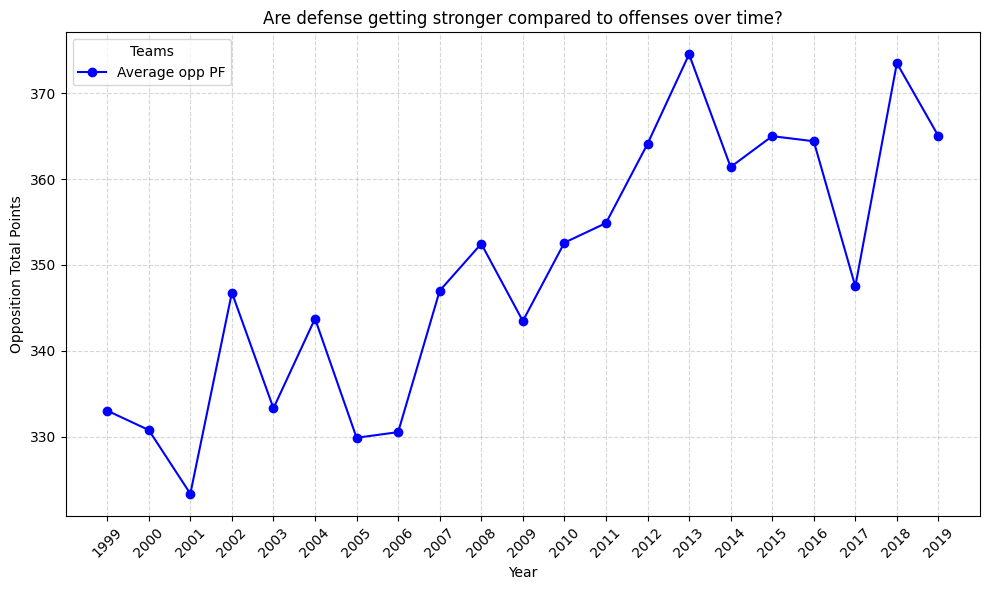

In [63]:
# Question 7: Are team's defenses getting stronger over time compared to their offenses
plt.figure(figsize=(10, 6))

yearly_avg = df.groupby("year")["opp PF"].mean().reset_index()
print(yearly_avg)
plt.plot(range(1999,2020), yearly_avg["opp PF"], marker="o", color="blue", label="Average opp PF")

print("Are defense getting stronger compared to offenses over time?")
plt.title("Are defense getting stronger compared to offenses over time?")
plt.xlabel("Year")
plt.ylabel("Opposition Total Points")
plt.xticks(range(1999,2020), rotation=45)
plt.legend(title="Teams")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Question 8: Which teams have the strongest Quarterback
A team's touchdown per interception is a strong indicator used to determine the strength of a team’s quarterback, the player responsible for throwing the ball each play. We would assume that quarterbacks famous for their skill would show up with their team in this graph. Besides the quarterback the wider receivers on a team are a direct indicator of effectiveness of overall offense performance. The wide receiver's inability to catch passes can lead to the cornerback interception and can overall affect the performance of a team. The reason the New England Patriots were dominating was because of great quarterback play and completion by the tight ends and wide receivers.

In [64]:
# Question 8: Which teams have the strongest Quarterback
teams_year_int_ratio = []
for code in df['team_code']:	

	row = df[code == df["team_code"]].iloc[0]
	value = row["pass td"] / row["int"]
	teams_year_int_ratio.append((value, row["team"], row["year"]))

teams_year_int_ratio = sorted(teams_year_int_ratio, key=lambda x: -x[0])


print("\n\nWhich team and year had the best Quarterback using td/int ratio?")
for i in range(5):
	print(teams_year_int_ratio[i][1] + " in " + teams_year_int_ratio[i][2] + " had a td/int ratio of " + str(round(teams_year_int_ratio[i][0], 4)))
	




Which team and year had the best Quarterback using td/int ratio?
nwe in 2016 had a td/int ratio of 16.0
nwe in 2010 had a td/int ratio of 7.4
gnb in 2019 had a td/int ratio of 6.5
gnb in 2011 had a td/int ratio of 6.375
gnb in 2014 had a td/int ratio of 6.3333


# Question 9: Is the sport getting more violent?
People we spoke to thought the sport itself had gotten more violent in recent years. We attempted to test this by measuring the number of penalties by year, which should partially show the trend for the overall aggressiveness of the games. This is an important factor since a significant issue for football has always been players being hurt and the prevention that it is a dangerous sport. An increase in dangerous plays would be a negative trend for the game that fans perceive. Our graph indicates that the trend has not increased significantly in recent years, which aligns with what we found online saying. 

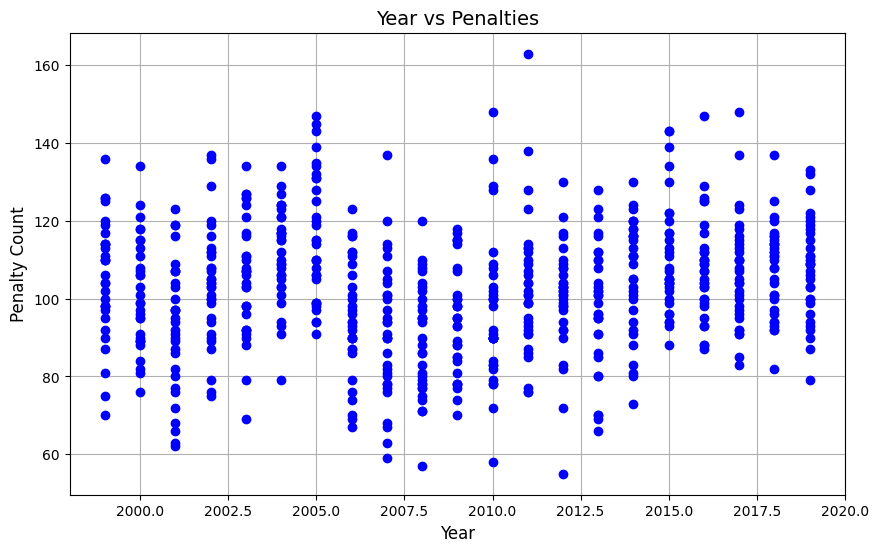

In [65]:
# Question 9: Is the sport getting more violent?

plt.figure(figsize=(10, 6))

plt.plot(df['year'].astype(int), df['penalties'], marker='o', linestyle='', color='b')

plt.title('Year vs Penalties', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Penalty Count', fontsize=12)
plt.grid(True)

plt.show()


# EDA
We use the EDA to gain a better understanding of our data as a whole and this allows us to confirm the data with our basic understanding of the sport as a whole. We also used this EDA to ensure we understood the home vs opposition variables and that they align across seasons  

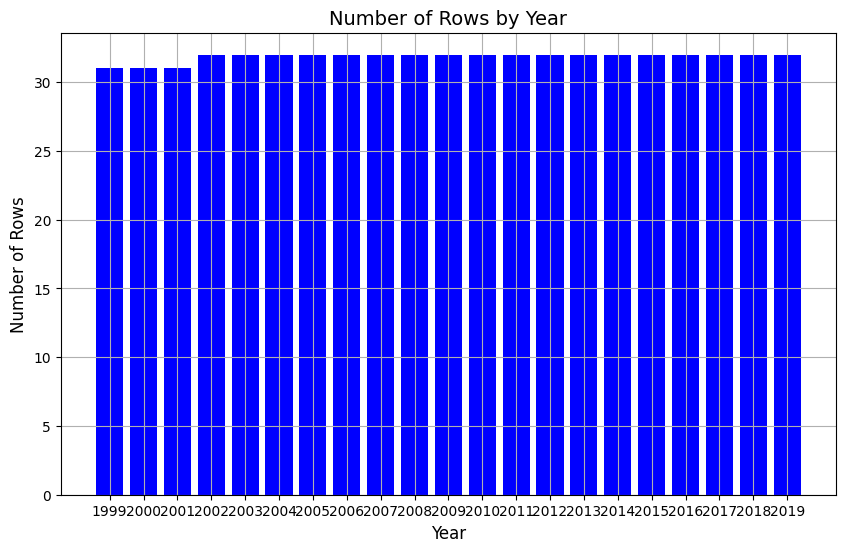

In [66]:
# Ensure each year has all 32 teams
rows_by_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))

plt.bar(rows_by_year.index, rows_by_year.values, color='b')

plt.title('Number of Rows by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)

plt.grid(True)

plt.show()

# We are missing some teams in the earliest year, we will remove them from long term data analysis

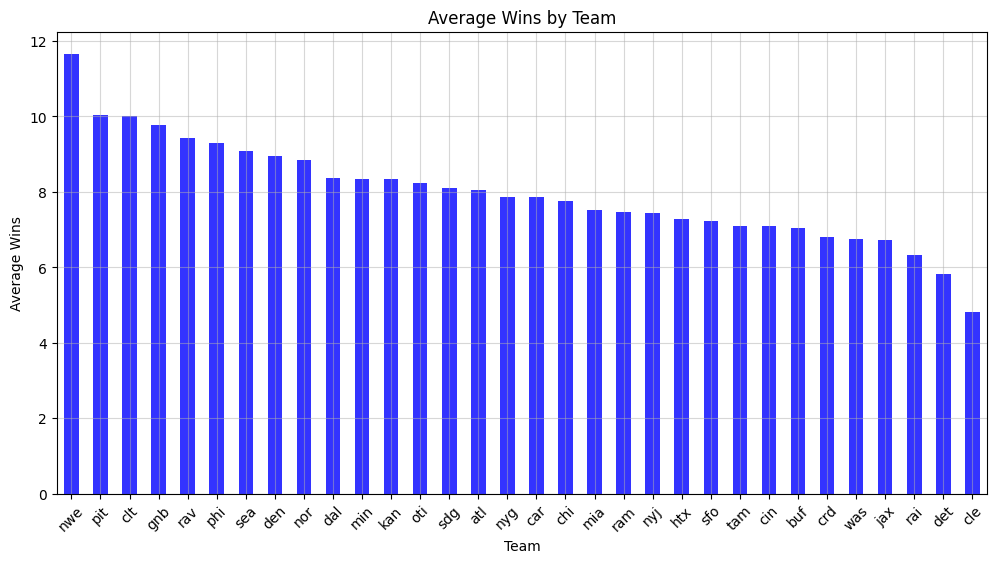

In [67]:
# EDA 2
# Average seasonal wins by team
average_wins = df.groupby("team")["wins"].mean()

average_wins = average_wins.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_wins.plot(kind="bar", color="blue", alpha=0.8)
plt.title("Average Wins by Team")
plt.xlabel("Team")
plt.ylabel("Average Wins")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

plt.show()

# This aligns which our knowledge of the sport and ensures that no team's are being removed or changed in our dataset

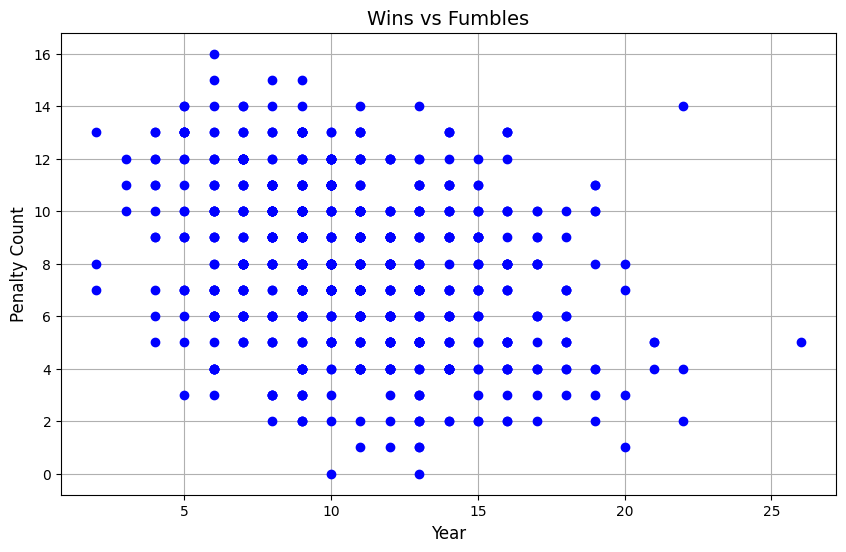

In [68]:
# EDA 3
# Number of penalties over time
plt.figure(figsize=(10, 6))

plt.plot(df['Fumbles Lost'], df['wins'], marker='o', linestyle='', color='b')

plt.title('Wins vs Fumbles', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Penalty Count', fontsize=12)
plt.grid(True)

plt.show()

# this shows some trend that teams who fumble less win more, which aligns with out understanding of the datapoints 